C:\Users\borde\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\borde\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\borde\Anaconda3\lib\site-packages\ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\borde\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: SettingWithCopyWarning: 
A val

working...
done


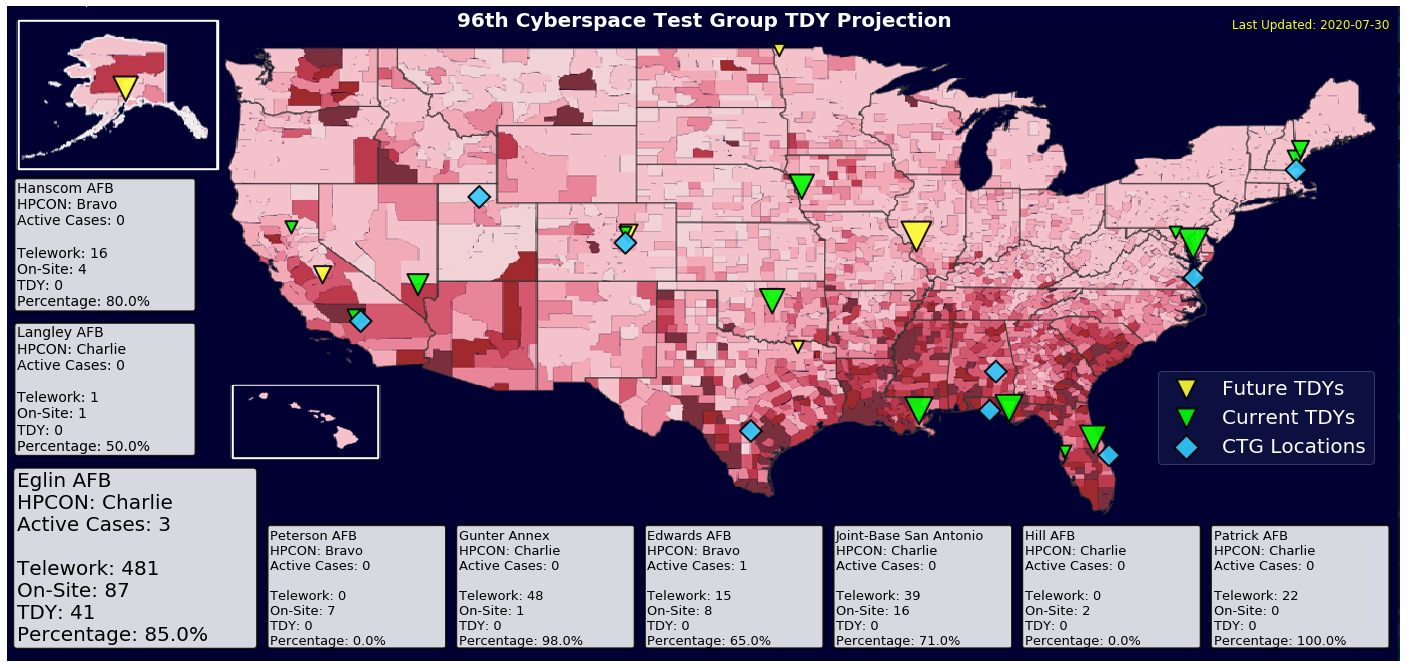

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches
import argparse
import seaborn as sns
from datetime import datetime, date, timedelta
import os


def CompileDataSets(unit):
    longitudes = []
    latitudes = []
    sizes = []
    statuses = []
    starts = []
    ends = []
    titles = []
    
    teleworks = []
    onSites = []
    percentages = []
    txts = []
    
    currentLong = []
    currentLat = []
    currentSize = []
    futureLong = []
    futureLat = []
    futureSize = []
    future14Long = []
    future14Lat = []
    future14Size = []
    pastLong = []
    pastLat = []
    pastSize = []
    
    inCurrentLong = []
    inCurrentLat = []
    inCurrentSize = []
    inFutureLong = []
    inFutureLat = []
    inFutureSize = []
    inFuture14Long = []
    inFuture14Lat = []
    inFuture14Size = []
    inPastLong = []
    inPastLat = []
    inPastSize = []
    
    programs = []
    reasons = []
    units = []
    states = []
    counties = []
    startDates = []
    endDates = []
    timing = []
    size = []
    base = []
    Files = []
    rate = []
    txtlocations = []
    
    date = pd.datetime.today()
    
##Import CTG Data
    os.chdir(r'C:\Users\borde\Desktop\COVID\Map Dashboard')
    CTG_pd = pd.read_csv('CTG_Locations.csv',index_col=False)
    
##Import All Data
    #Import File
    os.chdir(r'C:\Users\borde\Desktop\COVID\Map Dashboard\Input')
    AllTDYs_pd = pd.read_csv('TDYs.csv',index_col=False)

    os.chdir(r'C:\Users\borde\Desktop\COVID\Map Dashboard\Input')
    cases_pd = pd.read_csv('Active Cases.csv',index_col=False)
    cases = cases_pd['active']
    
#Import Telework File
    os.chdir(r'C:\Users\borde\Desktop\COVID\Map Dashboard\Input')
    telework_pd = pd.read_csv('Telework.csv',index_col=False)
    bases = CTG_pd['Base']
    HPCONS = [telework_pd['HPCON'][1], telework_pd['HPCON'][2], telework_pd['HPCON'][6], telework_pd['HPCON'][9], telework_pd['HPCON'][10], telework_pd['HPCON'][12], telework_pd['HPCON'][13], telework_pd['HPCON'][14], telework_pd['HPCON'][17]]
    
    for x in range(0,len(bases)):
        telework = telework_pd[telework_pd['Base']==bases[x]]['Telework'].sum() + telework_pd[telework_pd['Base']==bases[x]]['Leave'].sum()
        teleworks.append(telework)
        onSite = telework_pd[telework_pd['Base']==bases[x]]['On-Site'].sum()
        onSites.append(onSite)
        percent = round(telework/(telework+onSite)*100, 0)
        percentages.append(percent)
    
    totalPercent = round(sum(teleworks)/(sum(teleworks)+sum(onSites))*100)

##Correct Alaska
    for x in range(len(AllTDYs_pd)):
        if AllTDYs_pd['Location'][x] == "Anchorage, AK":
            AllTDYs_pd['Longitude'][x] = -129.6
            AllTDYs_pd['Latitude'][x] = 46

##Correct Hawaii
    for x in range(len(AllTDYs_pd)):
        if AllTDYs_pd['Location'][x] == "Camp Smith, HI":
            AllTDYs_pd['Longitude'][x] = -121.2
            AllTDYs_pd['Latitude'][x] = 30.5
        
##Filter Unit
    if unit == "96 CTG": 
        TDYs_pd = AllTDYs_pd
    else: 
        longitudes = AllTDYs_pd[AllTDYs_pd['Unit']==unit]['Longitude']
        latitudes = AllTDYs_pd[AllTDYs_pd['Unit']==unit]['Latitude']
        sizes = AllTDYs_pd[AllTDYs_pd['Unit']==unit]['Travelers']
        statuses = AllTDYs_pd[AllTDYs_pd['Unit']==unit]['Status']
        starts = AllTDYs_pd[AllTDYs_pd['Unit']==unit]['Start Date']
        ends = AllTDYs_pd[AllTDYs_pd['Unit']==unit]['End Date']
        titles = AllTDYs_pd[AllTDYs_pd['Unit']==unit]['Title']
        TDYs_pd = pd.DataFrame(list(zip(titles, statuses, sizes, starts, ends, latitudes, longitudes)), columns = ['Title', 'Status', 'Travelers', 'Start Date', 'End Date', 'Latitude', 'Longitude'])

        
    Start_Dates = pd.to_datetime(TDYs_pd['Start Date'], format = '%m/%d/%Y')
    End_Dates = pd.to_datetime(TDYs_pd['End Date'], format = '%m/%d/%Y')
        
##Filter Current, Future, Past TDYs
    for x in range(0,len(TDYs_pd)):
        if TDYs_pd['Title'][x][:4] != "INBO":
            if (TDYs_pd['Status'][x] != "Cancelled") and (TDYs_pd['Status'][x] != "Rejected") and (TDYs_pd['Title'][x][:4] != "PCS:") and (TDYs_pd['Title'][x][:4] != "LEAV"):
                if (Start_Dates[x] <= date+timedelta(7)) and (End_Dates[x] >= date):
                    currentLong.append(TDYs_pd['Longitude'][x])
                    currentLat.append(TDYs_pd['Latitude'][x])
                    currentSize.append(TDYs_pd['Travelers'][x])
                    programs.append(TDYs_pd['Title'][x])
                    reasons.append(TDYs_pd['Reason for TDY'][x])
                    units.append(TDYs_pd['Unit'][x])
                    states.append(TDYs_pd['State'][x])
                    counties.append(TDYs_pd['County'][x])
                    txtlocations.append(TDYs_pd['Location'][x])
                    startDates.append(Start_Dates[x])
                    endDates.append(End_Dates[x])
                    timing.append('Current')
                    size.append(TDYs_pd['Travelers'][x])
                elif (Start_Dates[x] > date+timedelta(7)):
                    if(Start_Dates[x] < date+timedelta(14)):
                        futureLong.append(TDYs_pd['Longitude'][x])
                        futureLat.append(TDYs_pd['Latitude'][x])
                        futureSize.append(TDYs_pd['Travelers'][x])
                        future14Long.append(TDYs_pd['Longitude'][x])
                        future14Lat.append(TDYs_pd['Latitude'][x])
                        future14Size.append(TDYs_pd['Travelers'][x])
                        programs.append(TDYs_pd['Title'][x])
                        reasons.append(TDYs_pd['Reason for TDY'][x])
                        units.append(TDYs_pd['Unit'][x])
                        states.append(TDYs_pd['State'][x])
                        counties.append(TDYs_pd['County'][x])
                        txtlocations.append(TDYs_pd['Location'][x])
                        startDates.append(Start_Dates[x])
                        endDates.append(End_Dates[x])
                        timing.append('Future')
                        size.append(TDYs_pd['Travelers'][x])
                    else:
                        futureLong.append(TDYs_pd['Longitude'][x])
                        futureLat.append(TDYs_pd['Latitude'][x])
                        futureSize.append(TDYs_pd['Travelers'][x])
                else:
                    pastLong.append(TDYs_pd['Longitude'][x])
                    pastLat.append(TDYs_pd['Latitude'][x])
                    pastSize.append(TDYs_pd['Travelers'][x])
            else:
                pastLong.append(TDYs_pd['Longitude'][x])
                pastLat.append(TDYs_pd['Latitude'][x])
                pastSize.append(TDYs_pd['Travelers'][x])
        else:
            if (TDYs_pd['Status'][x] != "Cancelled") and (TDYs_pd['Status'][x] != "Rejected") and (TDYs_pd['Title'][x][:4] != "PCS:") and (TDYs_pd['Title'][x][:4] != "LEAV"):
                if (Start_Dates[x] <= date+timedelta(7)) and (End_Dates[x] >= date):
                    inCurrentLong.append(TDYs_pd['Longitude'][x])
                    inCurrentLat.append(TDYs_pd['Latitude'][x])
                    inCurrentSize.append(TDYs_pd['Travelers'][x])
                elif (Start_Dates[x] > date+timedelta(7)):
                    if(Start_Dates[x] > date+timedelta(14)):
                        inFutureLong.append(TDYs_pd['Longitude'][x])
                        inFutureLat.append(TDYs_pd['Latitude'][x])
                        inFutureSize.append(TDYs_pd['Travelers'][x])
                        inFuture14Long.append(TDYs_pd['Longitude'][x])
                        inFuture14Lat.append(TDYs_pd['Latitude'][x])
                        inFuture14Size.append(TDYs_pd['Travelers'][x])
                    else:
                        inFutureLong.append(TDYs_pd['Longitude'][x])
                        inFutureLat.append(TDYs_pd['Latitude'][x])
                        inFutureSize.append(TDYs_pd['Travelers'][x])
                else:
                    inPastLong.append(TDYs_pd['Longitude'][x])
                    inPastLat.append(TDYs_pd['Latitude'][x])
                    inPastSize.append(TDYs_pd['Travelers'][x])
            else:
                inPastLong.append(TDYs_pd['Longitude'][x])
                inPastLat.append(TDYs_pd['Latitude'][x])
                inPastSize.append(TDYs_pd['Travelers'][x])
    
    for x in range(0, len(units)):
        if units[x] == '45 TS/OL-A':
            base.append('Gunter Annex')
        elif units[x] == '46 TS/OL-A':
            base.append('Patrick AFB')
        elif units[x] == '47 CTS':
            base.append('Joint-Base San Antonio')
        elif units[x] == '47 CTS/Det 1':
            base.append('Edwards AFB')
        elif units[x] == 'Det 1':
            base.append('Detachment 1')
        else:
            base.append('Eglin AFB')
    
    count = []
    notetxts = []
    risk = []
    rates = []
    
    os.chdir(r'C:\Users\borde\Desktop\COVID\Risk Locator')
    risk_pd = pd.read_excel(r'Output.xlsx')
    
    rates = risk_pd['Incidence_Rate']
    
    locations = []
    testLocations = []
    
    for x in range(0,len(risk_pd)):
        locations.append(risk_pd['County'][x] + ', ' + risk_pd['State'][x])
        
    for x in range(0,len(counties)):
        testLocations.append(str(counties[x]) + ', ' + str(states[x]))
    
    std = rates.std()
    mean = rates.mean()

    medium = np.float64(mean+std)
    high = np.float(mean+std*2)

    for x in range(0,len(counties)):
        rate.append(rates[locations.index(testLocations[x])])
    
    for x in range(0,len(rate)):
        if (rate[x] < medium):
            risk.append("LOW")
        elif (rate[x] >= medium) and (rate[x] < high):
            risk.append("MEDIUM")
        elif (rate[x] >= high):
            risk.append("HIGH")
        else:
            risk.append("ERROR")
    
    for x in range(0,len(programs)):
        txt2 = str(programs[x]) + " (" + str(size[x])[:-2] + ")\n" 
        txt2 += 'Location: ' + str(txtlocations[x]) + ' (' + str(risk[x]) + ')\n'
        txt2 += 'Dates: ' + str(startDates[x])[5:7] + '/' + str(startDates[x])[8:10] + ' - ' + str(endDates[x])[5:7] + '/' + str(endDates[x])[8:10] + '\n'
        txt2 += 'Reason: ' + str(reasons[x]) + '\n\n'
        notetxts.append(txt2)
    
    NoteInfo_pd = pd.DataFrame(list(zip(programs, units, base, reasons, size, counties, states, startDates, endDates, timing, notetxts)), columns = ['Title', 'Unit', 'Base', 'Reason', 'Travelers', 'County', 'State', 'Start', 'End', 'Timing', 'Text'])
    NoteInfo_pd.sort_values(by='Start')
    
    for x in range(0, len(bases)): 
        count.append(NoteInfo_pd.loc[(NoteInfo_pd['Timing']=='Current') & (NoteInfo_pd['Base']==bases[x]), 'Travelers'].sum())
    
    for x in range(0,len(bases)):
        txt = bases[x] + '\nHPCON: ' 
        txt += HPCONS[x] +'\n'
        txt += 'Active Cases: ' + str(cases[x]) + '\n\n' 
        txt += 'Telework: ' + str(teleworks[x])[:-2] + '\n'
        txt += 'On-Site: ' + str(onSites[x])[:-2] + '\n'
        txt += 'TDY: ' + str(count[x])[:-2] + '\n'
        txt += 'Percentage: ' + str(percentages[x]) + '%'
        txts.append(txt)
    
    TeleworkData_pd = pd.DataFrame(list(zip(bases, HPCONS, cases, teleworks, onSites, percentages, txts)), columns = ['Base', 'HPCON', 'Active Cases', 'Telework', 'On-Site', 'Percent', 'Text'])
        
##Import Apollyon Data
    os.chdir(r'C:\Users\borde\Desktop\COVID\Map Dashboard\Input')
    APTDYs_pd = pd.read_csv('ApollyonData2.csv',index_col=False)

    APStart_Dates = pd.to_datetime(APTDYs_pd['Arrival'], format = '%m/%d/%Y')
    APEnd_Dates = pd.to_datetime(APTDYs_pd['Departure'], format = '%m/%d/%Y')

    for x in range(0,len(APTDYs_pd)):
        if(APTDYs_pd['Country'][x] == 'USA' or 'US') and (APTDYs_pd['Arrival'][x] != 'NA') and (APTDYs_pd['Departure'][x] != 'NA') and (APTDYs_pd['Long'][x] != 'NA') and (APTDYs_pd['Lat'][x] != 'NA'):
            if (APStart_Dates[x] <= date+timedelta(7)) and (APEnd_Dates[x] >= date):
                inCurrentLong.append(APTDYs_pd['Long'][x])
                inCurrentLat.append(APTDYs_pd['Lat'][x])
                inCurrentSize.append(1)
            elif (APStart_Dates[x] > date+timedelta(7)):
                if (APStart_Dates[x] > date+timedelta(14)):
                    inFutureLong.append(APTDYs_pd['Long'][x])
                    inFutureLat.append(APTDYs_pd['Lat'][x])
                    inFutureSize.append(1)
                    inFuture14Long.append(APTDYs_pd['Long'][x])
                    inFuture14Lat.append(APTDYs_pd['Lat'][x])
                    inFuture14Size.append(1)
                else:
                    inFutureLong.append(APTDYs_pd['Long'][x])
                    inFutureLat.append(APTDYs_pd['Lat'][x])
                    inFutureSize.append(1)
            else:
                inPastLong.append(APTDYs_pd['Long'][x])
                inPastLat.append(APTDYs_pd['Lat'][x])
                inPastSize.append(1)

                
    CurrentComp_pd = pd.DataFrame(list(zip(currentLat, currentLong, currentSize)), columns = ['Latitude', 'Longitude', 'Size'])
    FutureComp_pd = pd.DataFrame(list(zip(futureLat, futureLong, futureSize)), columns = ['Latitude', 'Longitude', 'Size'])
    Future14Comp_pd = pd.DataFrame(list(zip(future14Lat, future14Long, future14Size)), columns = ['Latitude', 'Longitude', 'Size'])
    PastComp_pd = pd.DataFrame(list(zip(pastLat, pastLong, pastSize)), columns = ['Latitude', 'Longitude', 'Size'])
    InCurrentComp_pd = pd.DataFrame(list(zip(inCurrentLat, inCurrentLong, inCurrentSize)), columns = ['Latitude', 'Longitude', 'Size'])
    InFutureComp_pd = pd.DataFrame(list(zip(inFutureLat, inFutureLong, inFutureSize)), columns = ['Latitude', 'Longitude', 'Size'])
    InFuture14Comp_pd = pd.DataFrame(list(zip(inFuture14Lat, inFuture14Long, inFuture14Size)), columns = ['Latitude', 'Longitude', 'Size'])
    InPastComp_pd = pd.DataFrame(list(zip(inPastLat, inPastLong, inPastSize)), columns = ['Latitude', 'Longitude', 'Size'])
    
    CurrentGrouped_pd = CurrentComp_pd.groupby(['Latitude', 'Longitude'], as_index=False).agg({'Size': sum})
    FutureGrouped_pd = FutureComp_pd.groupby(['Latitude', 'Longitude'], as_index=False).agg({'Size': sum})
    Future14Grouped_pd = Future14Comp_pd.groupby(['Latitude', 'Longitude'], as_index=False).agg({'Size': sum})
    PastGrouped_pd = PastComp_pd.groupby(['Latitude', 'Longitude'], as_index=False).agg({'Size': sum})
    InCurrentGrouped_pd = InCurrentComp_pd.groupby(['Latitude', 'Longitude'], as_index=False).agg({'Size': sum})
    InFutureGrouped_pd = InFutureComp_pd.groupby(['Latitude', 'Longitude'], as_index=False).agg({'Size': sum})
    InFuture14Grouped_pd = InFuture14Comp_pd.groupby(['Latitude', 'Longitude'], as_index=False).agg({'Size': sum})
    InPastGrouped_pd = InPastComp_pd.groupby(['Latitude', 'Longitude'], as_index=False).agg({'Size': sum})
    
    CurrentGrouped_pd.loc[CurrentGrouped_pd['Size'] > 8] = 8
    FutureGrouped_pd.loc[FutureGrouped_pd['Size'] > 8] = 8
    Future14Grouped_pd.loc[Future14Grouped_pd['Size'] > 8] = 8
    PastGrouped_pd.loc[PastGrouped_pd['Size'] > 8] = 8
    InCurrentGrouped_pd.loc[InCurrentGrouped_pd['Size'] > 8] = 8
    InFutureGrouped_pd.loc[InFutureGrouped_pd['Size'] > 8] = 8
    InFuture14Grouped_pd.loc[InFuture14Grouped_pd['Size'] > 8] = 8
    InPastGrouped_pd.loc[InPastGrouped_pd['Size'] > 8] = 8

    return TeleworkData_pd, NoteInfo_pd, CurrentGrouped_pd, FutureGrouped_pd, Future14Grouped_pd, PastGrouped_pd, InCurrentGrouped_pd, InFutureGrouped_pd, InFuture14Grouped_pd, InPastGrouped_pd


def PrintAllTDYMap(telework, current, future, past, unit, sym, offset):
    os.chdir(r'C:\Users\borde\Desktop\COVID\Map Dashboard')
    CTG_pd = pd.read_csv('CTG_Locations.csv',index_col=False)

    BBox = (-136, -65, 18.5, 52)

    US_Map = plt.imread(r'C:\Users\borde\Desktop\COVID\Map Dashboard\US Map Complete2.PNG')
    fig, ax=plt.subplots(figsize = (25,20))

    
##Print CTG Static
    ax.scatter(past['Longitude'], past['Latitude']+offset, s=past['Size']*150, color='grey', label='Past TDYs', marker = sym, edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.scatter(future['Longitude'], future['Latitude']+offset, s=future['Size']*150, color='#FFFF33', label='Future TDYs', marker = sym, edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.scatter(current['Longitude'], current['Latitude']+offset, s=current['Size']*150, color='#00FF00', label = 'Current TDYs', marker = sym, edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.scatter(CTG_pd['Longitude'], CTG_pd['Latitude'], s=CTG_pd['Size'], color='white', label='CTG Locations', marker = 'D', edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.set_title(unit + ' All TDYs', fontsize=20, y=.96, color = 'white', fontweight = "bold")
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    ax.axis('off')

    lgnd = ax.legend(loc=[.825,.25], scatterpoints=1, fontsize = 20, facecolor='#3b547d', edgecolor = 'white', framealpha = .2)
    lgnd.legendHandles[0]._sizes = [400]
    lgnd.legendHandles[1]._sizes = [400]
    lgnd.legendHandles[2]._sizes = [400]
    lgnd.legendHandles[3]._sizes = [300]
    for text in lgnd.get_texts():
        text.set_color('white')
    
    teleworkBBox = dict(boxstyle='round,pad=.2', fc='white' , ec='black', lw=2, x=20, alpha=.85)
    
    ax.text(-135, 19.5, "                                     \n\n\n\n\n\n\n", size = 20, bbox=teleworkBBox)
    ax.text(-135, 29, "                                       \n\n\n\n\n\n\n", size = 14, bbox=teleworkBBox)
    ax.text(-135, 36.2, "                                       \n\n\n\n\n\n\n", size = 14, bbox=teleworkBBox)
    ax.text(-122.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-112.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-103.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-93.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-84.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-74.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    
    ax.text(-135, 19.5, telework['Text'][0], size = 20)
    ax.text(-135, 29, telework['Text'][5], size = 14)
    ax.text(-135, 36.2, telework['Text'][8], size = 14)
    ax.text(-122.3, 19.4, telework['Text'][7], size = 13)
    ax.text(-112.8, 19.4, telework['Text'][1], size = 13)
    ax.text(-103.3, 19.4, telework['Text'][4], size = 13)
    ax.text(-93.8, 19.4, telework['Text'][3], size = 13)
    ax.text(-84.3, 19.4, telework['Text'][6], size = 13)
    ax.text(-74.8, 19.4, telework['Text'][2], size = 13)
    
    ax.text(-74, 51, 'Last Updated: ' + str((pd.datetime.today()).date()), size = 12, color = 'yellow')
    
    ax.imshow(US_Map, zorder=0, extent = BBox, aspect='equal')

    
def PrintCFTDYMap(telework, current, future, unit, sym, offset):
    os.chdir(r'C:\Users\borde\Desktop\COVID\Map Dashboard')
    CTG_pd = pd.read_csv('CTG_Locations.csv',index_col=False)
    
    BBox = (-136, -65, 18.5, 52)

    US_Map = plt.imread(r'C:\Users\borde\Desktop\COVID\Map Dashboard\US Map Complete2.PNG')
    fig, ax=plt.subplots(figsize = (25,20))

    
##Print CTG Static
    ax.scatter(future['Longitude'], future['Latitude']+offset, s=future['Size']*150, color='#FFFF33', label='Future TDYs', marker = sym, edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.scatter(current['Longitude'], current['Latitude']+offset, s=current['Size']*150, color='#00FF00', label = 'Current TDYs', marker = sym, edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.scatter(CTG_pd['Longitude'], CTG_pd['Latitude'], s=CTG_pd['Size'], color='white', label='CTG Locations', marker = 'D', edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.set_title(unit + ' TDY Projection', fontsize=20, y=.96, color = 'white', fontweight = "bold")
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    ax.axis('off')

    lgnd = ax.legend(loc=[.825,.25], scatterpoints=1, fontsize = 20, facecolor='#3b547d', edgecolor = 'white', framealpha = .2)
    lgnd.legendHandles[0]._sizes = [400]
    lgnd.legendHandles[1]._sizes = [400]
    lgnd.legendHandles[2]._sizes = [300]
    for text in lgnd.get_texts():
        text.set_color('white')
    
    teleworkBBox = dict(boxstyle='round,pad=.2', fc='white' , ec='black', lw=2, x=20, alpha=.85)
    
    ax.text(-135, 19.5, "                                     \n\n\n\n\n\n\n", size = 20, bbox=teleworkBBox)
    ax.text(-135, 29, "                                       \n\n\n\n\n\n\n", size = 14, bbox=teleworkBBox)
    ax.text(-135, 36.2, "                                       \n\n\n\n\n\n\n", size = 14, bbox=teleworkBBox)
    ax.text(-122.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-112.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-103.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-93.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-84.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-74.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
   
    ax.text(-135, 19.5, telework['Text'][0], size = 20)
    ax.text(-135, 29, telework['Text'][5], size = 14)
    ax.text(-135, 36.2, telework['Text'][8], size = 14)
    ax.text(-122.3, 19.4, telework['Text'][7], size = 13)
    ax.text(-112.8, 19.4, telework['Text'][1], size = 13)
    ax.text(-103.3, 19.4, telework['Text'][4], size = 13)
    ax.text(-93.8, 19.4, telework['Text'][3], size = 13)
    ax.text(-84.3, 19.4, telework['Text'][6], size = 13)
    ax.text(-74.8, 19.4, telework['Text'][2], size = 13)
    
    ax.text(-74, 51, 'Last Updated: ' + str((pd.datetime.today()).date()), size = 12, color = 'yellow')
    
    ax.imshow(US_Map, zorder=0, extent = BBox, aspect='equal')    
    

def PrintCurrentTDYMap(telework, current, unit, sym, offset):
    date = pd.datetime.today()

    os.chdir(r'C:\Users\borde\Desktop\COVID\Map Dashboard')
    CTG_pd = pd.read_csv('CTG_Locations.csv',index_col=False)

    BBox = (-136, -65, 18.5, 52)

    US_Map = plt.imread(r'C:\Users\borde\Desktop\COVID\Map Dashboard\US Map Complete2.PNG')
    fig, ax=plt.subplots(figsize = (25,20))

    
##Print CTG Static
    ax.scatter(current['Longitude'], current['Latitude']+offset, s=current['Size']*150, color='#00FF00', label = 'Current TDYs', marker = sym, edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.scatter(CTG_pd['Longitude'], CTG_pd['Latitude'], s=CTG_pd['Size'], color='white', label='CTG Locations', marker = 'D', edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.set_title(unit + ' Current TDYs', fontsize=20, y=.96, color = 'white', fontweight = "bold")
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    ax.axis('off')

    lgnd = ax.legend(loc=[.825,.25], scatterpoints=1, fontsize = 20, facecolor='#3b547d', edgecolor = 'white', framealpha = .2)
    lgnd.legendHandles[0]._sizes = [400]
    lgnd.legendHandles[1]._sizes = [300]
    for text in lgnd.get_texts():
        text.set_color('white')
    
    teleworkBBox = dict(boxstyle='round,pad=.2', fc='white' , ec='black', lw=2, x=20, alpha=.85)
    
    ax.text(-135, 19.5, "                                     \n\n\n\n\n\n\n", size = 20, bbox=teleworkBBox)
    ax.text(-135, 29, "                                       \n\n\n\n\n\n\n", size = 14, bbox=teleworkBBox)
    ax.text(-135, 36.2, "                                       \n\n\n\n\n\n\n", size = 14, bbox=teleworkBBox)
    ax.text(-122.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-112.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-103.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-93.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-84.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-74.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    
    ax.text(-135, 19.5, telework['Text'][0], size = 20)
    ax.text(-135, 29, telework['Text'][5], size = 14)
    ax.text(-135, 36.2, telework['Text'][8], size = 14)
    ax.text(-122.3, 19.4, telework['Text'][7], size = 13)
    ax.text(-112.8, 19.4, telework['Text'][1], size = 13)
    ax.text(-103.3, 19.4, telework['Text'][4], size = 13)
    ax.text(-93.8, 19.4, telework['Text'][3], size = 13)
    ax.text(-84.3, 19.4, telework['Text'][6], size = 13)
    ax.text(-74.8, 19.4, telework['Text'][2], size = 13)
    
    ax.text(-74, 51, 'Last Updated: ' + str((pd.datetime.today()).date()), size = 12, color = 'yellow')
    
    ax.imshow(US_Map, zorder=0, extent = BBox, aspect='equal')      
    

def PrintFutureTDYMap(telework,future, unit, sym, offset):
    date = pd.datetime.today()

    os.chdir(r'C:\Users\borde\Desktop\COVID\Map Dashboard')
    CTG_pd = pd.read_csv('CTG_Locations.csv',index_col=False)

    BBox = (-136, -65.2, 18.5, 52)

    US_Map = plt.imread(r'C:\Users\borde\Desktop\COVID\Map Dashboard\US Map Complete2.PNG')
    fig, ax=plt.subplots(figsize = (40,30))

    
##Print CTG Static
    ax.scatter(future['Longitude'], future['Latitude']+offset, s=future['Size']*150, color='#FFFF33', label='Future TDYs', marker = sym, edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.scatter(CTG_pd['Longitude'], CTG_pd['Latitude'], s=CTG_pd['Size'], color='white', label='CTG Locations', marker = 'D', edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.set_title(unit + ' Future TDYs', fontsize=20, y=.96, color = 'white', fontweight = "bold")
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    ax.axis('off')

    lgnd = ax.legend(loc=[.825,.25], scatterpoints=1, fontsize = 20, facecolor='#3b547d', edgecolor = 'white', framealpha = .2)
    lgnd.legendHandles[0]._sizes = [400]
    lgnd.legendHandles[1]._sizes = [300]
    for text in lgnd.get_texts():
        text.set_color('white')
    
    teleworkBBox = dict(boxstyle='round,pad=.2', fc='white' , ec='black', lw=2, x=20, alpha=.85)
    
    #ax.text(-135, 19.5, "                                     \n\n\n\n\n\n\n", size = 20, bbox=teleworkBBox)
    #ax.text(-135, 29, "                                       \n\n\n\n\n\n\n", size = 14, bbox=teleworkBBox)
    #ax.text(-135, 36.2, "                                       \n\n\n\n\n\n\n", size = 14, bbox=teleworkBBox)
    #ax.text(-122.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    #ax.text(-112.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    #ax.text(-103.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    #ax.text(-93.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    #ax.text(-84.3, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    #ax.text(-74.8, 19.4, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    
    #ax.text(-135, 19.5, telework['Text'][0], size = 20)
    #ax.text(-135, 29, telework['Text'][5], size = 14)
    #ax.text(-135, 36.2, telework['Text'][8], size = 14)
    #ax.text(-122.3, 19.4, telework['Text'][7], size = 13)
    #ax.text(-112.8, 19.4, telework['Text'][1], size = 13)
    #ax.text(-103.3, 19.4, telework['Text'][4], size = 13)
    #ax.text(-93.8, 19.4, telework['Text'][3], size = 13)
    #ax.text(-84.3, 19.4, telework['Text'][6], size = 13)
    #ax.text(-74.8, 19.4, telework['Text'][2], size = 13)
    
    ax.text(-74, 51, 'Last Updated: ' + str((pd.datetime.today()).date()), size = 12, color = 'yellow')
    
    ax.imshow(US_Map, zorder=0, extent = BBox, aspect='equal')  

    
def AssembleHuddle(notes, telework, current, future, unit, sym, offset):
    os.chdir(r'C:\Users\borde\Desktop\COVID\Map Dashboard')
    CTG_pd = pd.read_csv('CTG_Locations.csv',index_col=False)
    
    BBox = (-135.5, -66, 18, 50.6)

    US_Map = plt.imread(r'C:\Users\borde\Desktop\COVID\Map Dashboard\US Map Complete3.PNG')
    fig,ax=plt.subplots(figsize = (25,20))

    
##Print CTG Static
    ax.scatter(future['Longitude'], future['Latitude']+offset, s=future['Size']*150, color='#FFFF33', label='Future TDYs', marker = sym, edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.scatter(current['Longitude'], current['Latitude']+offset, s=current['Size']*150, color='#00FF00', label = 'Current TDYs', marker = sym, edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.scatter(CTG_pd['Longitude'], CTG_pd['Latitude'], s=CTG_pd['Size']*.6, color='#33CCFF', label='CTG Locations', marker = 'D', edgecolors = 'black', linewidth = 2, alpha = .9)
    ax.set_title(unit + ' TDY Projection', fontsize=20, y=.96, color = 'white', fontweight = "bold")
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    ax.axis('off')

    lgnd = ax.legend(loc=[.825,.30], scatterpoints=1, fontsize = 20, facecolor='#3b547d', edgecolor = 'white', framealpha = .2)
    lgnd.legendHandles[0]._sizes = [400]
    lgnd.legendHandles[1]._sizes = [400]
    lgnd.legendHandles[2]._sizes = [300]
    for text in lgnd.get_texts():
        text.set_color('white')
    
    teleworkBBox = dict(boxstyle='round,pad=.2', fc='white' , ec='black', lw=2, x=20, alpha=.85)
    
    ax.text(-135, 19, "                                     \n\n\n\n\n\n\n", size = 20, bbox=teleworkBBox)
    ax.text(-135, 28.5, "                                       \n\n\n\n\n\n\n", size = 14, bbox=teleworkBBox)
    ax.text(-135, 35.7, "                                       \n\n\n\n\n\n\n", size = 14, bbox=teleworkBBox)
    ax.text(-122.4, 18.9, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-113, 18.9, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-103.6, 18.9, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-94.2, 18.9, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-84.8, 18.9, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    ax.text(-75.4, 18.9, "                                          \n\n\n\n\n\n\n", size = 13, bbox=teleworkBBox)
    
    ax.text(-135, 19, telework['Text'][0], size = 20)
    ax.text(-135, 28.5, telework['Text'][5], size = 14)
    ax.text(-135, 35.7, telework['Text'][8], size = 14)
    ax.text(-122.4, 18.8, telework['Text'][7], size = 13)
    ax.text(-113, 18.8, telework['Text'][1], size = 13)
    ax.text(-103.6, 18.8, telework['Text'][4], size = 13)
    ax.text(-94.2, 18.8, telework['Text'][3], size = 13)
    ax.text(-84.8, 18.8, telework['Text'][6], size = 13)
    ax.text(-75.4, 18.8, telework['Text'][2], size = 13)
    
    ax.text(-74.5, 49.5, 'Last Updated: ' + str((pd.datetime.today()).date()), size = 12, color = 'yellow')
    
    filename = "CTG Test Huddle - " + str((pd.datetime.today()).date()) + '.png'
    #print(filename)
    os.chdir(r'C:\Users\borde\Desktop\COVID\Map Dashboard\Output')
    print("working...")
    ax.imshow(US_Map, zorder=0, extent = BBox, aspect='equal') 
    fig.savefig(filename, bbox_inches='tight') 
    print("done")
    
    prs = Presentation('Huddle Template.pptx')
    slide = prs.slides.add_slide(prs.slide_layouts[8])
    title = slide.shapes.title
    pic = slide.shapes.add_picture(filename, Inches(-.05), Inches(1.2), width=Inches(10.1), height=Inches(5.8)) 
    title.text = "96 CTG COVID Dashboard"
    notes_slide = slide.notes_slide
    text_Frame = notes_slide.notes_text_frame
    #display(notes)
    for x in range(0,len(notes)):
        text_Frame.text += notes['Text'][x]
    prs.save('CTG Test Huddle - ' + str((pd.datetime.today()).date()) + '.pptx')

Telework, Notes, Current, Future, Future14, Past, InCurrent, InFuture, InFuture14, InPast = CompileDataSets("96 CTG")
AssembleHuddle(Notes, Telework, Current, Future14, "96th Cyberspace Test Group", 'v', .5)
#PrintAllTDYMap(Telework, Current, Future, Past, "96th Cyberspace Test Group", 'v', .5)
#PrintCFTDYMap(Telework, InCurrent, InFuture, "Apollyon", '^', 0)
#PrintCurrentTDYMap(Telework, Current, "96th Cyberspace Test Group", 'v', .5)
#PrintFutureTDYMap(Telework, InFuture, "Apollyon 2020", '^', 0)
#PrintAllTDYMap(Telework, InCurrent, InFuture, InPast, "96th Cyberspace Test Group", '^', 0)